In [88]:
import pandas as pd
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F

from sklearn.model_selection import train_test_split

import pipeline
import importlib
importlib.reload(pipeline)

<module 'pipeline' from '/content/pipeline.py'>

In [0]:
df = pd.read_csv('df.csv', index_col = 0)
labels = pd.read_csv('labels.csv', index_col = 0)

In [0]:
class Net(nn.Module):
    def __init__(self, input_dim, output_dim):
        #torch.manual_seed(0)
        super(Net, self).__init__()
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(input_dim, 1024)
        self.fc2 = nn.Linear(1024, 1024)
        self.fc3 = nn.Linear(1024, 512)
        self.fc4 = nn.Linear(512, 512)
        self.fc5 = nn.Linear(512, 512)
        self.fc6 = nn.Linear(512, output_dim)
        self.softmax = nn.LogSoftmax(dim=-1)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = self.softmax(self.fc6(x))
        return x

In [91]:
models = {n_labels : pipeline.Model(Net(df.shape[1], int(n_labels)), df, labels[n_labels]) for n_labels in labels.columns}
nets = {n_labels : model.train(nn.NLLLoss()) for n_labels, model in models.items()}

[0] loss: 0.534
[5] loss: 1.347
[10] loss: 0.158
[15] loss: 0.002
[20] loss: 0.000
[25] loss: 0.000
Terminated Early. 10 successive epochs all have 0 loss
Finished Training
[0] loss: 1.826
[5] loss: 5.515
[10] loss: 1.328
[15] loss: 0.132
[20] loss: 5.648
[25] loss: 4.718
[30] loss: 0.539
[35] loss: 0.022
[40] loss: 0.002
[45] loss: 0.001
[50] loss: 0.001
[55] loss: 0.001
[60] loss: 0.001
[65] loss: 0.000
[70] loss: 0.000
[75] loss: 0.000
[80] loss: 0.000
[85] loss: 0.000
[90] loss: 0.000
[95] loss: 0.000
[100] loss: 0.000
[105] loss: 0.000
[110] loss: 0.000
[115] loss: 0.000
[120] loss: 0.000
[125] loss: 0.000
[130] loss: 0.000
[135] loss: 0.000
[140] loss: 0.000
[145] loss: 0.000
[150] loss: 0.000
[155] loss: 0.000
[160] loss: 0.000
[165] loss: 0.000
[170] loss: 0.000
[175] loss: 0.000
[180] loss: 0.000
[185] loss: 0.000
[190] loss: 0.000
[195] loss: 0.000
[200] loss: 0.000
[205] loss: 0.000
[210] loss: 0.000
[215] loss: 0.000
Terminated Early. 10 successive epochs all have 0 loss
Fi

In [0]:
aucs = {n_labels : model.auc() for n_labels, model in models.items()}

In [0]:
# compute hamming distance from point to set
def ham_set(p, t):
    p = p.transpose()
    n1 = np.matmul(t, p)
    n0 = np.matmul(1 - t, 1 - p)
    return len(p) - np.amax(n1 + n0, axis=0)

In [0]:
by_distance = {n_labels : model.auc_by_distance(ham_set, 3) for n_labels, model in models.items()}

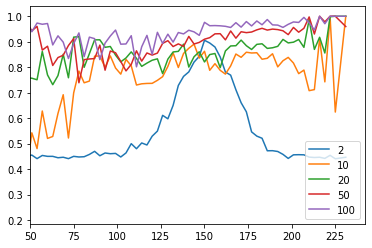

In [106]:
import matplotlib.pyplot as plt
for n_labels, pair in by_distance.items():
    keys, aucs = pair
    plt.plot(keys, aucs, label = n_labels)
plt.legend(loc = 'lower right')
plt.xlim(left = 50)
plt.show()

In [96]:
by_distance

{'10': ([14,
   19,
   23,
   24,
   26,
   27,
   28,
   29,
   30,
   31,
   32,
   33,
   36,
   37,
   38,
   39,
   40,
   41,
   42,
   43,
   44,
   45,
   46,
   47,
   48,
   49,
   50,
   51,
   52,
   53,
   54,
   55,
   56,
   57,
   58,
   59,
   60,
   61,
   62,
   63,
   64,
   65,
   66,
   67,
   68,
   69,
   70,
   71,
   72,
   73,
   74,
   75,
   76,
   77,
   78,
   79,
   80,
   81,
   82,
   83,
   84,
   85,
   86,
   87,
   88,
   89,
   90,
   91,
   92,
   93,
   94,
   95,
   96,
   97,
   98,
   99,
   100,
   101,
   102,
   103,
   104,
   105,
   106,
   107,
   108,
   109,
   110,
   111,
   112,
   113,
   114,
   115,
   116,
   117,
   118,
   119,
   120,
   121,
   122,
   123,
   124,
   125,
   126,
   127,
   128,
   129,
   130,
   131,
   132,
   133,
   134,
   135,
   136,
   137,
   138,
   139,
   140,
   141,
   142,
   143,
   144,
   145,
   146,
   147,
   148,
   149,
   150,
   151,
   152,
   153,
   154,
   155,
   156,
   157